<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/SC_Metodo_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos de soluções numéricas para ODEs com o método de Euler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

## Exemplo 1 
 Considere o problema de valor inicial:

 \begin{equation}
\dot{u}(t) = 2u
 \end{equation}

 com $u(t=0) = 1$

 Use o método de Euler para encontrar a solução aproximada. Compare-a com solução analítica $u(t) = e^{2t}$.

In [ ]:
# Definindo os parâmetros
h = 0.1 # passo
tfim = 5
nt = int(tfim/h) # numero de iterações
s0 = 1 # Condição Inicial

In [ ]:
u = np.zeros(nt)
u[0] = s0
for k in np.arange(1,nt):
  u[k] = u[k-1]+2*h*u[k-1]


In [ ]:
t = np.linspace(0,tfim,nt)

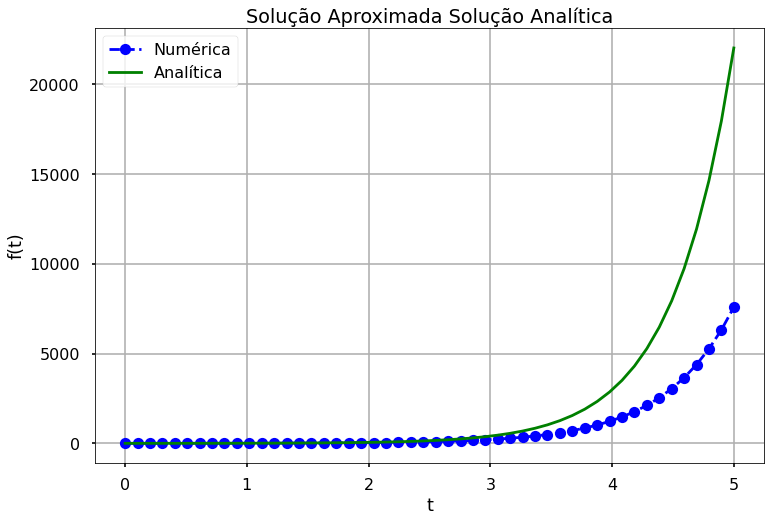

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(t, u, 'bo--', label='Numérica')
plt.plot(t, np.exp(2*t), 'g', label='Analítica')
plt.title('Solução Aproximada \
Solução Analítica')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

É útil definir uma função para automatizar o gráfico acima:

In [ ]:
def faz_grafico_euler(tempo,y,f_analitica,h=0.01):
  plt.figure(figsize = (12, 8))
  plt.plot(tempo, y, 'bo--', label='Numérica com h={}'.format(h))
  plt.plot(tempo,f_analitica, 'g', label='Analítica')
  plt.title('Solução Aproximada \
  Solução Analítica')
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.grid()
  plt.legend(loc='upper left')
  plt.show() 

## Exemplo 2

Escreva uma função generalizada para o método de Euler.

In [ ]:
def Euler(f,h=0.01,s0=1,tmax=10):
  nt = int(tmax/h)
  u = np.zeros(nt)
  tempo = np.linspace(0,tmax,nt)
  u[0] = s0
    
  for k in np.arange(1,nt):
      u[k] = u[k-1] + h*f(tempo[k-1],u[k-1]) 
      

  return tempo,u




In [ ]:
# Testando para o exemplo 1

f = lambda t,u: 2*u # ODE
h = 0.1
s0=1
tmax = 5

In [ ]:

tempo,y = Euler(h,f,s0,tmax)

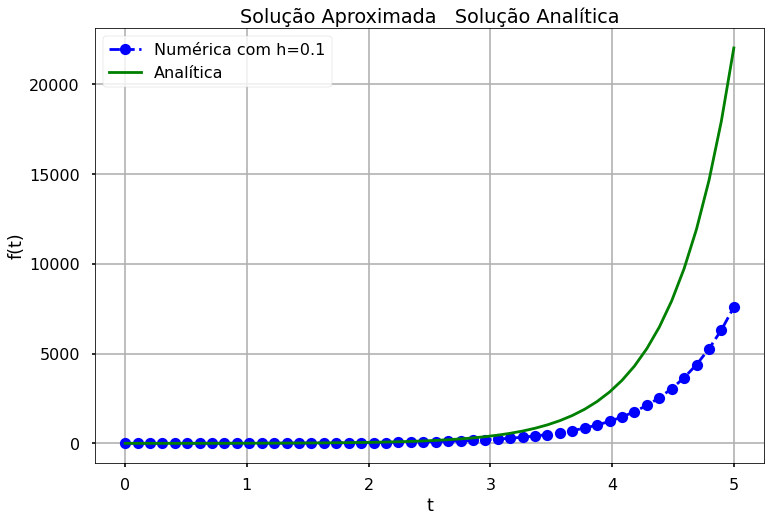

In [ ]:
faz_grafico_euler(tempo,y,np.exp(2*tempo),0.1)

## Exemplo 3 

Teste a função Euler para o problema de valor inicial:

\begin{equation}
\dot{u} = u(t)(1-u(t))
\end{equation}

com $u(0) = 0.5$.
Compare com a solução analítica: $u(t)=e^t/(1+e^{t})$

In [ ]:
# Resolvendo o exemplo 3

f = lambda t,u: u*(1-u) # ODE
h = 0.1
s0=.5
tmax = 5

In [ ]:
tempo,y = Euler(h,f,s0,tmax)

In [ ]:
f_analitica = lambda t: np.exp(t)/(1+np.exp(t))

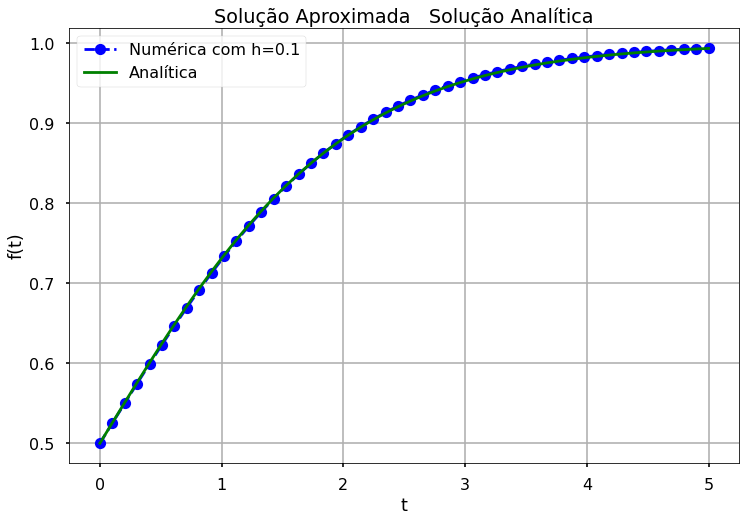

In [ ]:
faz_grafico_euler(tempo,y,f_analitica(tempo),h)